<a href="https://colab.research.google.com/github/cmannnn/workhuman_data_analytic_canidate_exercise/blob/main/workhuman_data_analytic_canidate_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Key Fields**

*   visitId – this is the unique random identifier assigned by Google to each visit
*   fullVisitorId – this is the unique random identifier assigned by Google to each distinct user
*   hits.type – denotes the category of the hit (pageview, event, transaction, etc)
*   hits.page.pagePath – the URL pathname of the page where the hit occurred
hits.eventInfo. (columns AQ-AS) – this is the custom taxonomy for non-pageload interactions
*   trafficsource. (columns J-N) – these are UTM attributes about the referrer of the visit
*   device. (columns O-R) – these are technology attributes about the user
geoNetwork. (columns S-V) – these are location attributes about the user








# **Business KPIs**


*   Prospect conversion rate – the percent of first-time visitors with a transaction, excluding any returning customers
*   Channel revenue contribution – how much revenue is attributed to each acquisition channel
*   Gross margin – the percent of all e-commerce revenue – cost of goods sold out of total revenue








# **Business Questions**

*   What is the best way to segment Google organic search traffic, and why?
*   Which entry page(s) would be a good place to focus on optimizing and why?
*   What is the best way to measure how many transactions were completed and conversion rate, and why?
*   Which continent has the highest add-to-cart rate on mobile?
*   Given the above business KPIs, please provide 3 suggestions for additional data to be captured in Google Analytics to make this dataset more useful.

#Imports

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colabby Krabby Paddy/workhuman_data_analytic_canidate_exercise/da_google_analytics_sample.xlsx'

In [4]:
df = pd.read_excel(path, index_col = 'fullVisitorID')

In [5]:
cols_to_drop = ['trafficSource.campaignCode', 'hits.transaction.transactionCoupon', 'hits.eventInfo.eventValue', 'userId']
df.drop(cols_to_drop, axis = 1, inplace = True)

In [6]:
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')

# Current

In [7]:
df_grouped = df.groupby(df.index)

In [8]:
df.head(3)

,visitNumber,visitId,visitStartTime,date,totals.visits,totals.hits,totals.pageviews,totals.timeOnSite,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.ountry,geoNetwork.networkDomain,hits.hitNumber,hits.time,hits.hour,hits.minute,hits.isInteraction,hits.isEntrance,hits.isExit,hits.referer,hits.page.pagePath,hits.page.hostname,hits.page.pageTitle,hits.page.pagePathLevel1,hits.page.pagePathLevel2,hits.page.pagePathLevel3,hits.page.pagePathLevel4,hits.transaction.transactionId,hits.transaction.transactionRevenue,hits.transaction.transactionTax,hits.transaction.transactionShipping,hits.eventInfo.eventCategory,hits.eventInfo.eventAction,hits.eventInfo.eventLabel,hits.eCommerceAction.action_type,hits.eCommerceAction.step,hits.eCommerceAction.option,hits.type,hits.latencyTracking.pageLoadSample,hits.latencyTracking.pageLoadTime,hits.latencyTracking.pageDownloadTime,channelGrouping
fullVisitorID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8467980000000000000,1,1489544305,1489544305,2017-03-14,1,1,1.0,NaN,1.0,(not set),google,organic,(not provided),Chrome,Windows,False,desktop,Oceania,Australasia,Australia,bigpond.net.au,1,0,19,18,True,1.0,1.0,https://www.google.com.au/,/home,www.googlemerchandisestore.com,Google Online Store,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
1061800000000000000,1,1489496466,1489496466,2017-03-14,1,1,1.0,NaN,1.0,(not set),google,organic,(not provided),Chrome,Windows,False,desktop,Europe,Western Europe,France,eurorscg.fr,1,0,6,1,True,1.0,1.0,https://www.google.fr/,/home,www.googlemerchandisestore.com,Google Online Store,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
2833520000000000000,1,1489517319,1489517319,2017-03-14,1,1,1.0,NaN,1.0,(not set),bing,organic,google merchandise,Internet Explorer,Windows,True,mobile,Asia,Western Asia,Israel,sfr.net,1,0,11,48,True,1.0,1.0,http://www.bing.com/search?q=google+merchandis...,/home,www.googlemerchandisestore.com,Google Online Store,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search


In [9]:
df['device.deviceCategory'].value_counts()

desktop    7753
mobile     1784
tablet      183
Name: device.deviceCategory, dtype: int64

In [10]:
df['device.browser'].value_counts()

Chrome                      7590
Safari                       950
Firefox                      440
Edge                         300
Internet Explorer            153
Android Webview              128
Opera Mini                    78
Safari (in-app)               47
UC Browser                    13
Opera                          8
YaBrowser                      4
Amazon Silk                    3
Coc Coc                        2
Android Browser                2
Nokia Browser                  1
Mozilla Compatible Agent       1
Name: device.browser, dtype: int64

[]

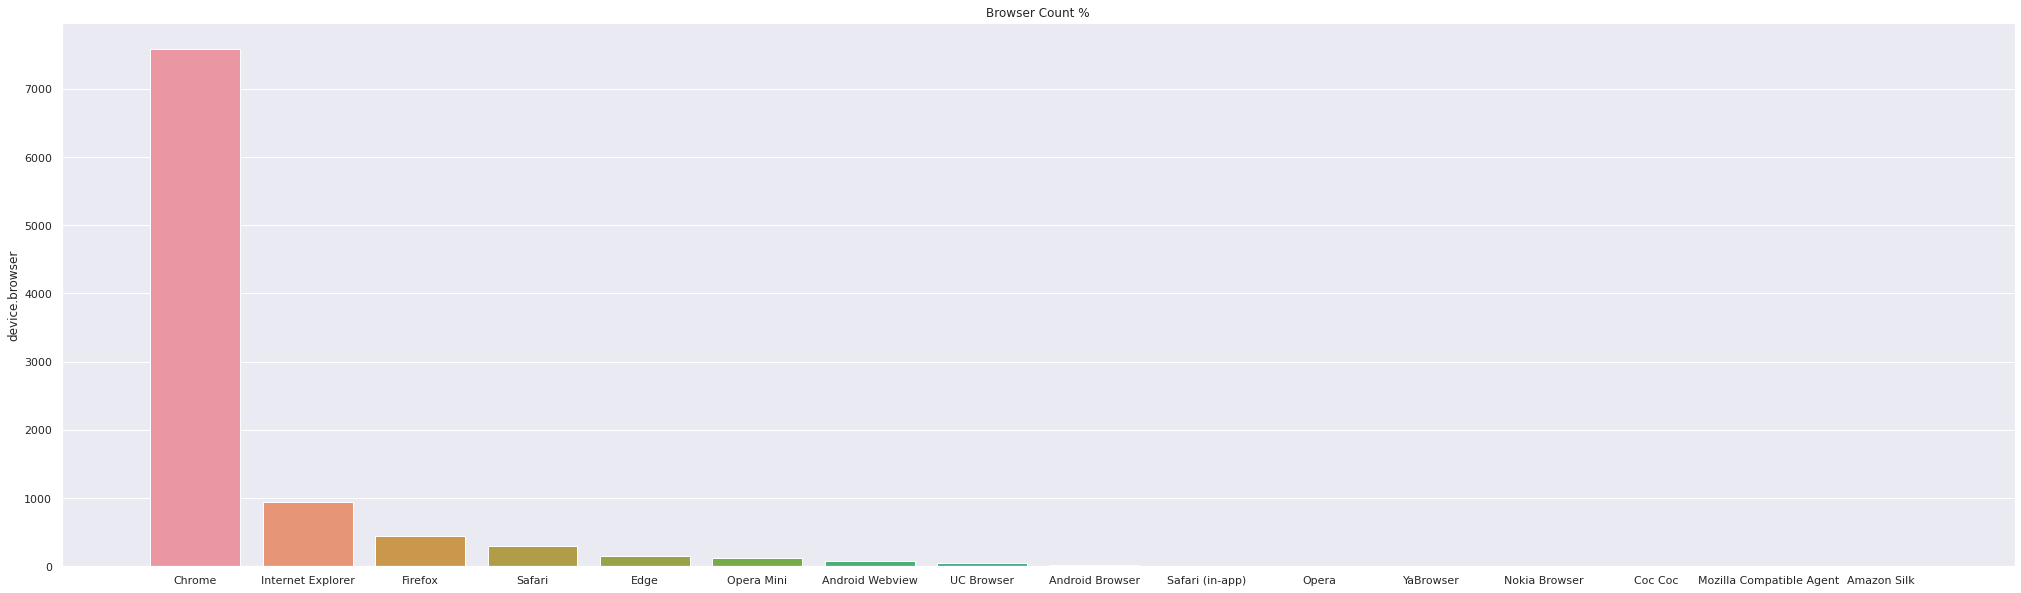

In [11]:
# browser count
ax, fig = plt.subplots(figsize = (35,10))
sns.barplot(x = df['device.browser'].unique(), y = df['device.browser'].value_counts())
plt.title('Browser Count %')
plt.plot()

In [12]:
df['device.deviceCategory'].value_counts()

desktop    7753
mobile     1784
tablet      183
Name: device.deviceCategory, dtype: int64

[]

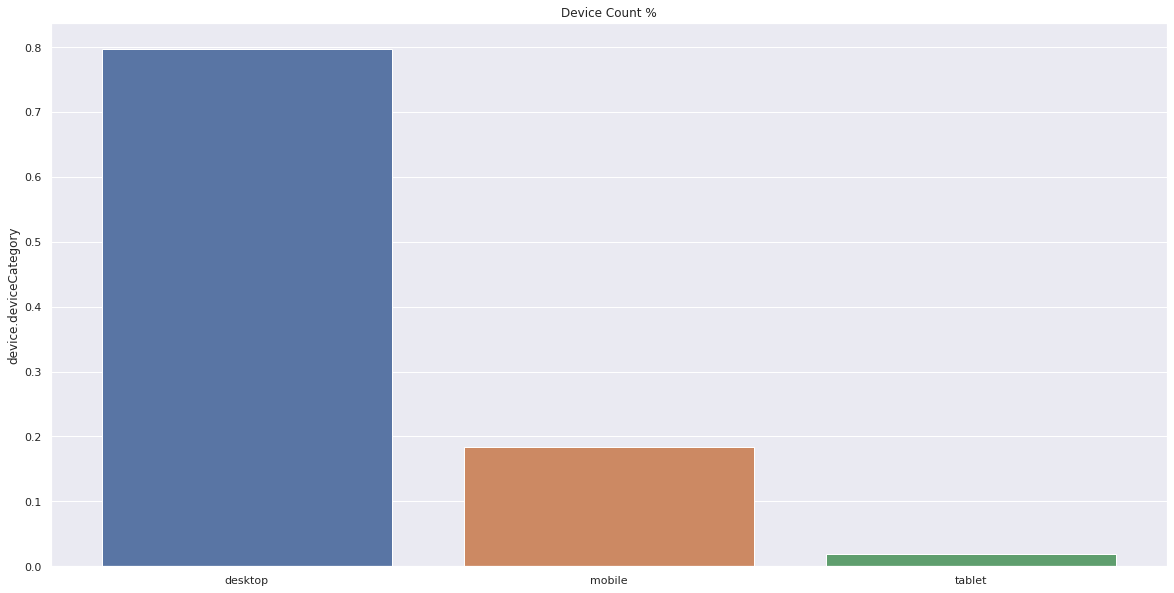

In [13]:
#device.deviceCategory	
ax, fig = plt.subplots(figsize = (20,10))
sns.barplot(x = df['device.deviceCategory'].unique(), y = df['device.deviceCategory'].value_counts() / df['device.deviceCategory'].value_counts().sum())
plt.title('Device Count %')
plt.plot()

[]

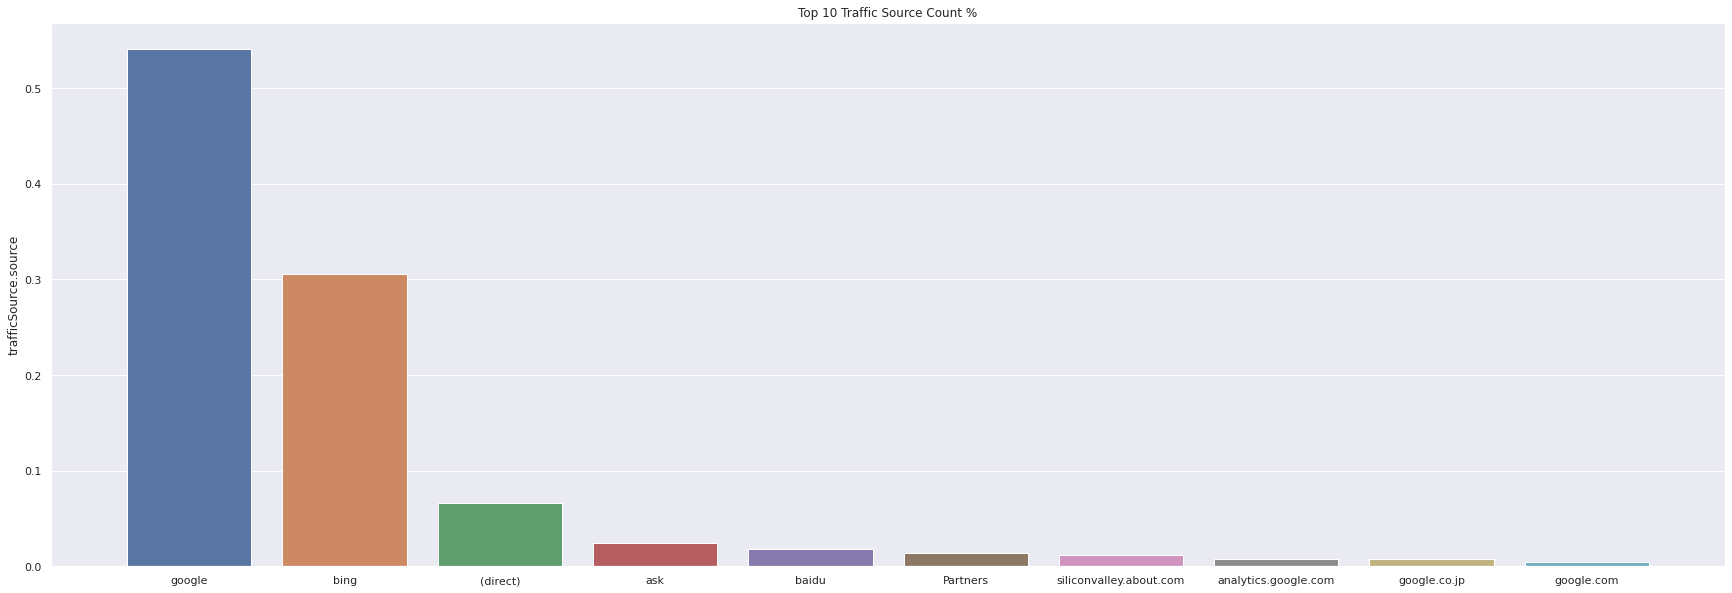

In [14]:
#device.deviceCategory	
ax, fig = plt.subplots(figsize = (30,10))
sns.barplot(x = df['trafficSource.source'].unique()[0:10], y = df['trafficSource.source'].value_counts().iloc[:10] / df['trafficSource.source'].value_counts().iloc[:10].sum())
plt.title('Top 10 Traffic Source Count %')
plt.plot()

In [15]:
df['channelGrouping'].value_counts()

Organic Search    5013
Referral          1932
Direct            1421
Social             938
Paid Search        217
Affiliates         127
Display             72
Name: channelGrouping, dtype: int64

In [16]:
df['device.isMobile'].value_counts()

False    7753
True     1967
Name: device.isMobile, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

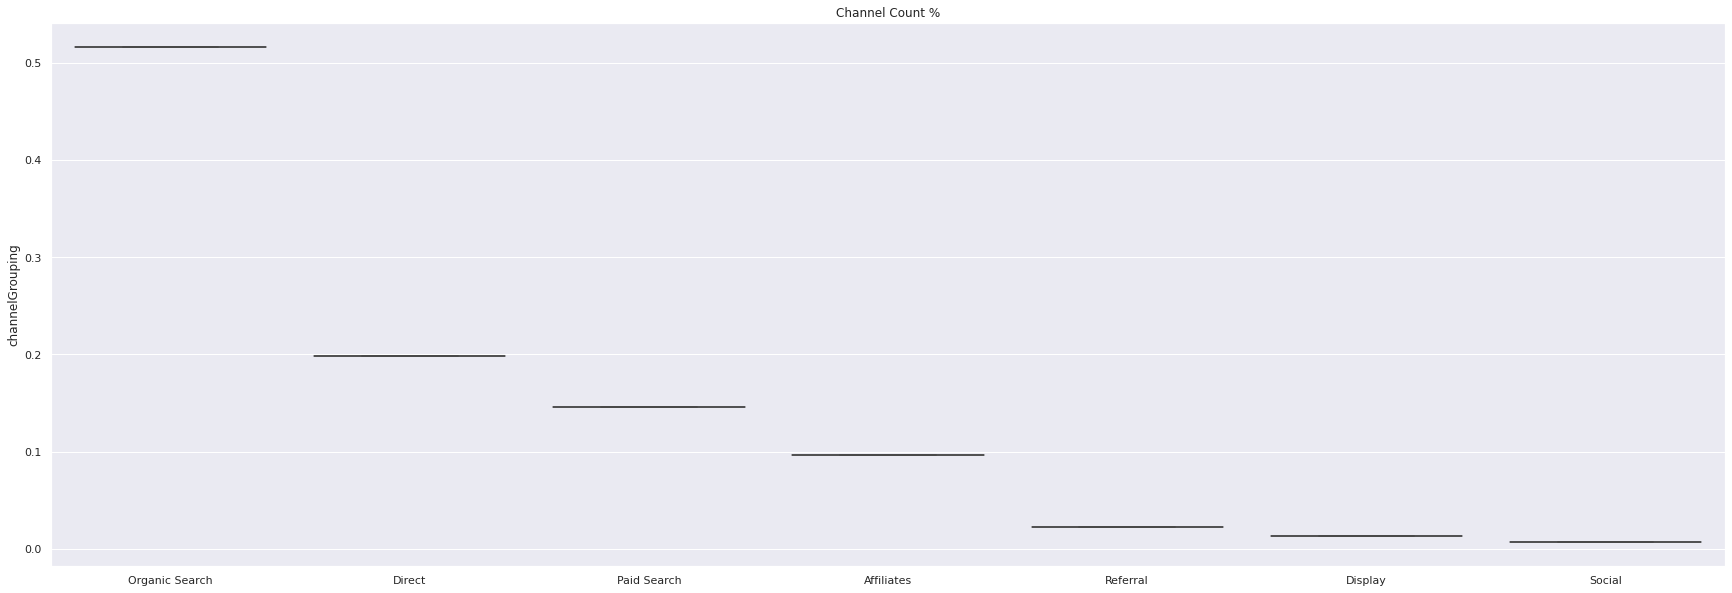

In [36]:
ax, fig = plt.subplots(figsize = (30,10))
sns.boxplot(df['channelGrouping'].unique(), df['channelGrouping'].value_counts() / df['channelGrouping'].value_counts().sum())
plt.title('Channel Count %')
plt.plot()

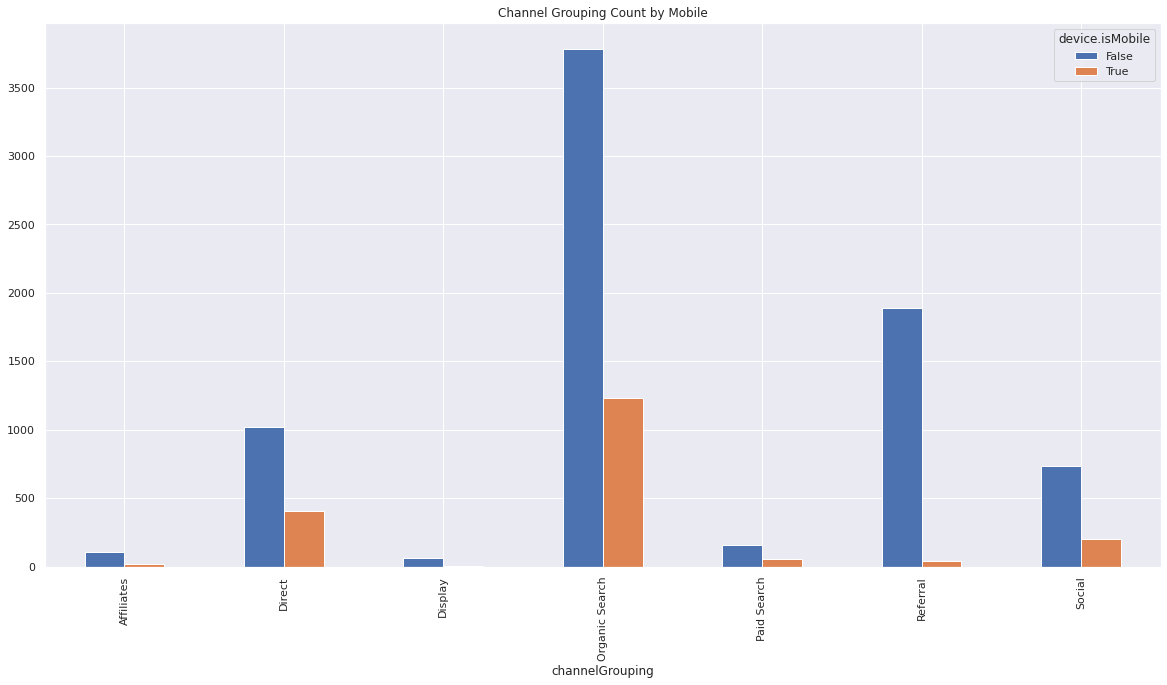

In [18]:
channel_mobile_group = df.groupby(['channelGrouping', 'device.isMobile'])
channel_mobile_group_count = channel_mobile_group['channelGrouping'].count()
channel_mobile_group_count.unstack().plot.bar(figsize = (20, 10), title = 'Channel Grouping Count by Mobile')

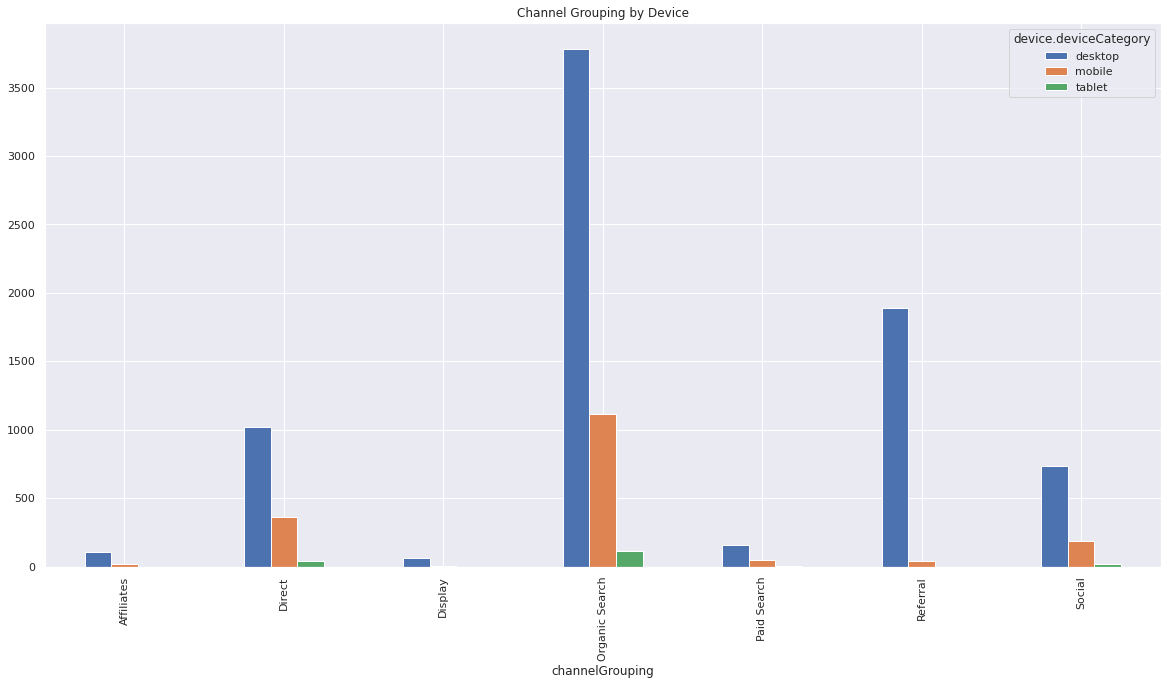

In [19]:
#df['device.deviceCategory'].value_counts()
device_category_mobile_group = df.groupby(['channelGrouping', 'device.deviceCategory'])
device_category_mobile_group_count = device_category_mobile_group['channelGrouping'].count()
device_category_mobile_group_count.unstack().plot.bar(figsize = (20, 10), title = 'Channel Grouping by Device')

In [20]:
df['hits.type'].value_counts()

PAGE     8550
EVENT    1170
Name: hits.type, dtype: int64

In [21]:
df['hits.transaction.transactionRevenue'].value_counts()

22190000.0     3
17990000.0     2
23990000.0     2
119960000.0    1
29990000.0     1
181970000.0    1
38000000.0     1
23190000.0     1
96950000.0     1
124150000.0    1
135970000.0    1
77970000.0     1
487700000.0    1
121900000.0    1
71480000.0     1
104970000.0    1
20990000.0     1
132980000.0    1
140170000.0    1
110970000.0    1
199950000.0    1
44990000.0     1
110950000.0    1
10980000.0     1
112980000.0    1
229970000.0    1
23980000.0     1
24990000.0     1
109960000.0    1
5590000.0      1
245860000.0    1
85080000.0     1
236990000.0    1
95400000.0     1
130950000.0    1
81850000.0     1
Name: hits.transaction.transactionRevenue, dtype: int64

In [22]:
df['visitNumber'].value_counts()

1      6746
2      1218
3       468
4       421
5       231
7       120
6       115
22       81
12       53
14       47
9        32
20       28
10       21
19       16
17       16
15       15
11       14
8        12
21        9
27        6
23        6
38        5
24        4
13        4
265       4
227       3
35        3
138       3
36        3
48        2
18        2
134       2
136       2
64        1
135       1
65        1
137       1
63        1
228       1
85        1
43        1
Name: visitNumber, dtype: int64

In [23]:
df.dtypes

visitNumber                                       int64
visitId                                           int64
visitStartTime                                    int64
date                                     datetime64[ns]
totals.visits                                     int64
totals.hits                                       int64
totals.pageviews                                float64
totals.timeOnSite                               float64
totals.newVisits                                float64
trafficSource.campaign                           object
trafficSource.source                             object
trafficSource.medium                             object
trafficSource.keyword                            object
device.browser                                   object
device.operatingSystem                           object
device.isMobile                                    bool
device.deviceCategory                            object
geoNetwork.continent                            

In [24]:
df.describe()

,visitNumber,visitId,visitStartTime,totals.visits,totals.hits,totals.pageviews,totals.timeOnSite,totals.newVisits,hits.hitNumber,hits.time,hits.hour,hits.minute,hits.isEntrance,hits.isExit,hits.transaction.transactionRevenue,hits.transaction.transactionTax,hits.transaction.transactionShipping,hits.eCommerceAction.action_type,hits.eCommerceAction.step,hits.latencyTracking.pageLoadSample,hits.latencyTracking.pageLoadTime,hits.latencyTracking.pageDownloadTime
count,9720.000000,9.720000e+03,9.720000e+03,9720.0,9720.000000,9718.000000,8533.000000,6746.0,9720.000000,9.720000e+03,9720.000000,9720.000000,2337.0,2337.0,4.000000e+01,3.200000e+01,4.000000e+01,9720.000000,9720.000000,95.0,95.000000,95.000000
mean,2.554218,1.489520e+09,1.489520e+09,1.0,21.861934,17.791727,853.666237,1.0,11.446399,4.066472e+05,12.038374,29.548765,1.0,1.0,9.800775e+07,1.435594e+07,1.478125e+07,0.504733,1.028807,1.0,11470.368421,684.947368
std,8.921266,2.279635e+04,2.279499e+04,0.0,38.012443,31.022326,1854.433413,0.0,22.831471,1.215049e+06,6.331991,17.318717,0.0,0.0,9.170047e+07,9.682333e+06,9.080651e+06,1.195207,0.213240,0.0,40755.534447,4788.293425
min,1.000000,1.489473e+09,1.489475e+09,1.0,1.000000,1.000000,2.000000,1.0,1.000000,0.000000e+00,0.000000,0.000000,1.0,1.0,5.590000e+06,2.970000e+06,7.500000e+06,0.000000,1.000000,1.0,1194.000000,1.000000
25%,1.000000,1.489504e+09,1.489504e+09,1.0,3.000000,3.000000,105.000000,1.0,2.000000,3.724500e+03,8.000000,15.000000,1.0,1.0,2.398750e+07,7.872500e+06,1.050000e+07,0.000000,1.000000,1.0,2616.500000,57.500000
50%,1.000000,1.489520e+09,1.489520e+09,1.0,10.000000,9.000000,316.000000,1.0,4.000000,7.619000e+04,12.000000,29.000000,1.0,1.0,9.024000e+07,1.288000e+07,1.150000e+07,0.000000,1.000000,1.0,3535.000000,119.000000
75%,2.000000,1.489536e+09,1.489536e+09,1.0,23.000000,18.000000,758.000000,1.0,11.000000,2.914350e+05,17.000000,45.000000,1.0,1.0,1.258500e+08,1.707250e+07,1.450000e+07,0.000000,1.000000,1.0,6270.000000,156.000000
max,265.000000,1.489561e+09,1.489561e+09,1.0,205.000000,179.000000,12136.000000,1.0,205.000000,1.213579e+07,23.000000,59.000000,1.0,1.0,4.877000e+08,5.162000e+07,5.573000e+07,6.000000,3.000000,1.0,381337.000000,46713.000000


#1. What is the best way to segment Google organic search traffic, and why?

In [25]:
df['channelGrouping'].value_counts()

Organic Search    5013
Referral          1932
Direct            1421
Social             938
Paid Search        217
Affiliates         127
Display             72
Name: channelGrouping, dtype: int64

In [26]:
df['trafficSource.source'].value_counts()

google                     5119
(direct)                   2891
youtube.com                 623
l.facebook.com              230
analytics.google.com        170
Partners                    127
google.com                  111
dfa                          72
bing                         68
mail.google.com              43
sites.google.com             36
siliconvalley.about.com      35
sashihara.jp                 31
yahoo                        24
m.facebook.com               22
reddit.com                   21
t.co                         18
baidu                        13
groups.google.com            10
facebook.com                  8
qiita.com                     8
docs.google.com               8
blog.golang.org               7
ask                           6
quora.com                     6
businessinsider.com           5
google.nl                     2
google.co.jp                  2
web.skype.com                 1
blognone.com                  1
google.co.th                  1
google.c

In [28]:
# channelgrouping = 'organic search' & traffic source = 'google'
google_organic_traffic = df[(df['channelGrouping'] == 'Organic Search') & (df['trafficSource.source'] == 'google')]

In [ ]:
google_organic_traffic.tail(5)

In [50]:
#channel_mobile_group = df.groupby(['channelGrouping', 'device.isMobile'])
#channel_mobile_group_count = channel_mobile_group['channelGrouping'].count()
#channel_mobile_group_count.unstack().plot.bar(figsize = (20, 10), title = 'Channel Grouping Count by Mobile')
google_organic_traffic_by_continent = google_organic_traffic.groupby(['geoNetwork.continent']).count()
print(google_organic_traffic_by_continent)

google_organic_traffic_by_subContinent = google_organic_traffic.groupby(['geoNetwork.subContinent']).count()
#print(google_organic_traffic_by_subContinent)

google_organic_traffic_by_country = google_organic_traffic.groupby(['geoNetwork.ountry']).count()
#print(google_organic_traffic_by_country)

                      visitNumber  ...  channelGrouping
geoNetwork.continent               ...                 
(not set)                       9  ...                9
Africa                         28  ...               28
Americas                     3021  ...             3021
Asia                          581  ...              581
Europe                       1214  ...             1214
Oceania                        49  ...               49

[6 rows x 50 columns]


In [35]:
google_organic_traffic.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 4902 entries, 8467980000000000000 to 6957250000000000000
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   visitNumber                            4902 non-null   int64         
 1   visitId                                4902 non-null   int64         
 2   visitStartTime                         4902 non-null   int64         
 3   date                                   4902 non-null   datetime64[ns]
 4   totals.visits                          4902 non-null   int64         
 5   totals.hits                            4902 non-null   int64         
 6   totals.pageviews                       4900 non-null   float64       
 7   totals.timeOnSite                      4307 non-null   float64       
 8   totals.newVisits                       3801 non-null   float64       
 9   trafficSource.campaign       

#2. Which entry page(s) would be a good place to focus on optimizing and why?

# 3. What is the best way to measure how many transactions were completed and conversion rate, and why?

#4. Which continent has the highest add-to-cart rate on mobile?

#5.Given the above business KPIs, please provide 3 suggestions for additional data to be captured in Google Analytics to make this dataset more useful.